# Análise Exploratória dos Dados
---

In [1]:
# importanto bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importando dados

dados_WoE_VI = pd.read_csv('dados/clean_data.csv')

In [7]:
# o dataset possui 877648 observações e 18 variáveis

dados_WoE_VI.shape

(877648, 18)

In [5]:
# 5 primeiras observações

dados_WoE_VI.head()

funded_amnt  term  int_rate home_ownership  annual_inc verification_status  \
0       9000.0    36      5.32            OWN     58000.0     Source Verified   
1       8300.0    36      9.44           RENT     54000.0     Source Verified   
2       4225.0    36     17.57           RENT     35000.0        Not Verified   
3      28000.0    36      7.49       MORTGAGE    425000.0     Source Verified   
4       3000.0    36      5.31       MORTGAGE     72000.0        Not Verified   

              purpose    dti  inq_last_6mths  revol_util initial_list_status  \
0    home_improvement  10.39             0.0         4.2                   w   
1  debt_consolidation  16.91             0.0        30.7                   w   
2  debt_consolidation  29.25             2.0        82.0                   f   
3  debt_consolidation   8.97             0.0        28.0                   f   
4  debt_consolidation  14.60             0.0         3.0                   w   

   tot_cur_bal  mths_since_rcnt_il  total_bal_il  max_bal_bc  \
0       7063.0                26.0        1982.0      1301.0   
1      26958.0                 4.0       21058.0      3075.0   
2      35796.0                 0.0           0.0         0.0   
3     503070.0                 0.0           0.0         0.0   
4     305664.0                 3.0       28880.0       625.0   

   total_rev_hi_lim grade  target  
0          120600.0     A       1  
1           19200.0     B       1  
2            9380.0     D       1  
3           75900.0     A       1  
4           47300.0     A       1

In [6]:
# 5 últimas observações

dados_WoE_VI.tail()

funded_amnt  term  int_rate home_ownership  annual_inc  \
877643      29000.0    36      5.32       MORTGAGE    108000.0   
877644      13000.0    36      5.32       MORTGAGE     46900.0   
877645      12000.0    36     11.47           RENT     70000.0   
877646      10000.0    36     12.69       MORTGAGE     35000.0   
877647      40000.0    60      7.34           RENT    139000.0   

       verification_status             purpose    dti  inq_last_6mths  \
877643     Source Verified         credit_card  13.32             0.0   
877644        Not Verified                 car  18.81             0.0   
877645     Source Verified  debt_consolidation  22.36             1.0   
877646            Verified  debt_consolidation  27.81             1.0   
877647        Not Verified    home_improvement  25.96             2.0   

        revol_util initial_list_status  tot_cur_bal  mths_since_rcnt_il  \
877643        48.8                   f     141500.0                98.0   
877644        74.1                   w     125982.0                 5.0   
877645        69.3                   w      42108.0                 8.0   
877646        32.3                   w     126324.0                 0.0   
877647         0.3                   f     148102.0                10.0   

        total_bal_il  max_bal_bc  total_rev_hi_lim grade  target  
877643        6897.0     13109.0           62100.0     A       1  
877644       40568.0         0.0           28700.0     A       1  
877645       28528.0      6337.0           19600.0     B       0  
877646           0.0         0.0           46700.0     C       1  
877647      134325.0     13660.0           72500.0     A       1

In [8]:
# separação do dataset em variáveis numéricas e categóricas

var_num = dados_WoE_VI.select_dtypes(include = np.number).columns.tolist()
var_cat = dados_WoE_VI.select_dtypes('object').columns.tolist()

In [9]:
# medidas resumo das variáveis quantitativas

dados_WoE_VI.describe(percentiles = [.25, .5, .75, .95, .99])

funded_amnt           term       int_rate    annual_inc  \
count  877648.000000  877648.000000  877648.000000  8.776480e+05   
mean    15345.913396      43.094872      13.043788  7.999860e+04   
std      9466.009368      10.951706       4.859772  1.435073e+05   
min       500.000000      36.000000       5.310000  0.000000e+00   
25%      8000.000000      36.000000       9.170000  4.700000e+04   
50%     13000.000000      36.000000      12.490000  6.600000e+04   
75%     20000.000000      60.000000      15.990000  9.500000e+04   
95%     35000.000000      60.000000      22.350000  1.686273e+05   
99%     40000.000000      60.000000      27.270000  2.800000e+05   
max     40000.000000      60.000000      30.990000  1.100000e+08   

                 dti  inq_last_6mths     revol_util   tot_cur_bal  \
count  877648.000000   877648.000000  877648.000000  8.776480e+05   
mean       19.290343        0.553079      48.961379  1.418145e+05   
std        16.019488        0.858343      24.928945  1.634241e+05   
min         0.000000        0.000000       0.000000  0.000000e+00   
25%        12.050000        0.000000      29.700000  2.751400e+04   
50%        18.070000        0.000000      48.600000  7.581900e+04   
75%        24.870000        1.000000      68.100000  2.136290e+05   
95%        34.690000        2.000000      90.500000  4.485500e+05   
99%        48.320000        3.000000      98.000000  7.002791e+05   
max       999.000000       32.000000     184.600000  9.971659e+06   

       mths_since_rcnt_il  total_bal_il     max_bal_bc  total_rev_hi_lim  \
count       877648.000000  8.776480e+05  877648.000000      8.776480e+05   
mean            13.946480  2.599508e+04    4230.978431      3.574251e+04   
std             22.745488  4.214553e+04    5541.568807      3.722942e+04   
min              0.000000  0.000000e+00       0.000000      0.000000e+00   
25%              0.000000  0.000000e+00       0.000000      1.490000e+04   
50%              7.000000  1.141400e+04    2682.000000      2.620000e+04   
75%             17.000000  3.548400e+04    6186.000000      4.490000e+04   
95%             52.000000  9.995130e+04   14817.000000      9.520000e+04   
99%            121.000000  1.955985e+05   24002.000000      1.676000e+05   
max            507.000000  1.837038e+06  500000.000000      9.999999e+06   

              target  
count  877648.000000  
mean        0.869974  
std         0.336332  
min         0.000000  
25%         1.000000  
50%         1.000000  
75%         1.000000  
95%         1.000000  
99%         1.000000  
max         1.000000

In [10]:
# estatísticas dos dados categóricos

dados_WoE_VI.describe(include = 'object').T

count unique                 top    freq
home_ownership       877648      6            MORTGAGE  430783
verification_status  877648      3     Source Verified  341893
purpose              877648     14  debt_consolidation  491672
initial_list_status  877648      2                   w  642039
grade                877648      7                   B  257221

In [11]:
# número de classes únicas de cada variável categórica

dados_WoE_VI[var_cat].nunique()

home_ownership          6
verification_status     3
purpose                14
initial_list_status     2
grade                   7
dtype: int64

### Avaliando a distribuição das variáveis quantitativas

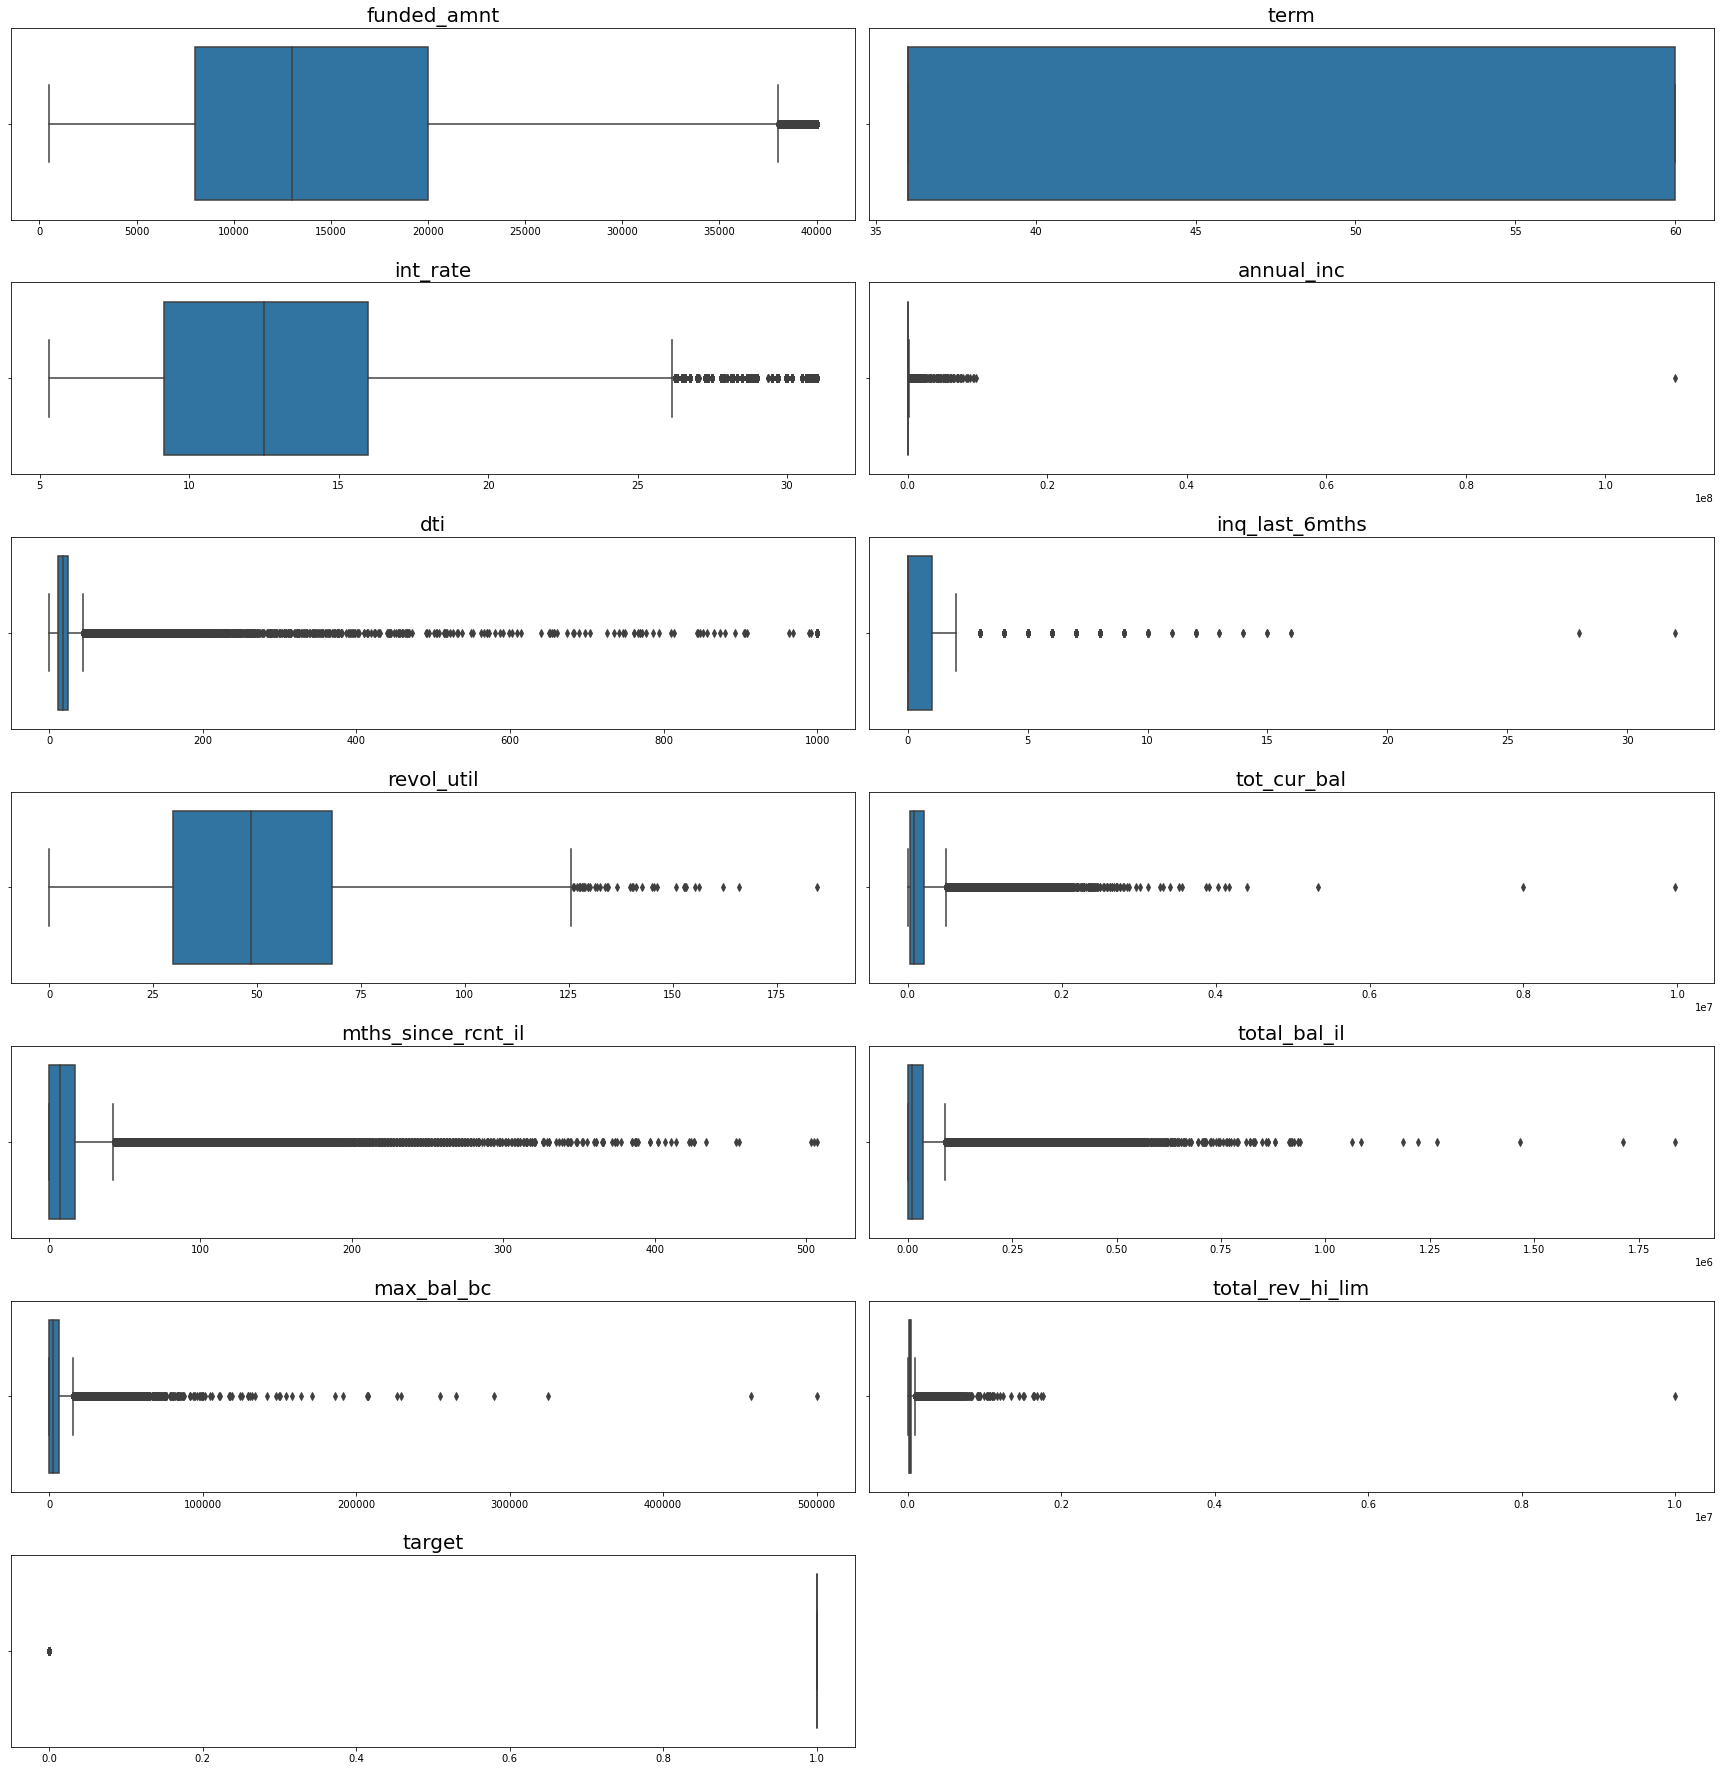

In [11]:
plt.figure(figsize=(24, 28))

for i in range(0, len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.boxplot(x = dados_WoE_VI[var_num[i]])
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

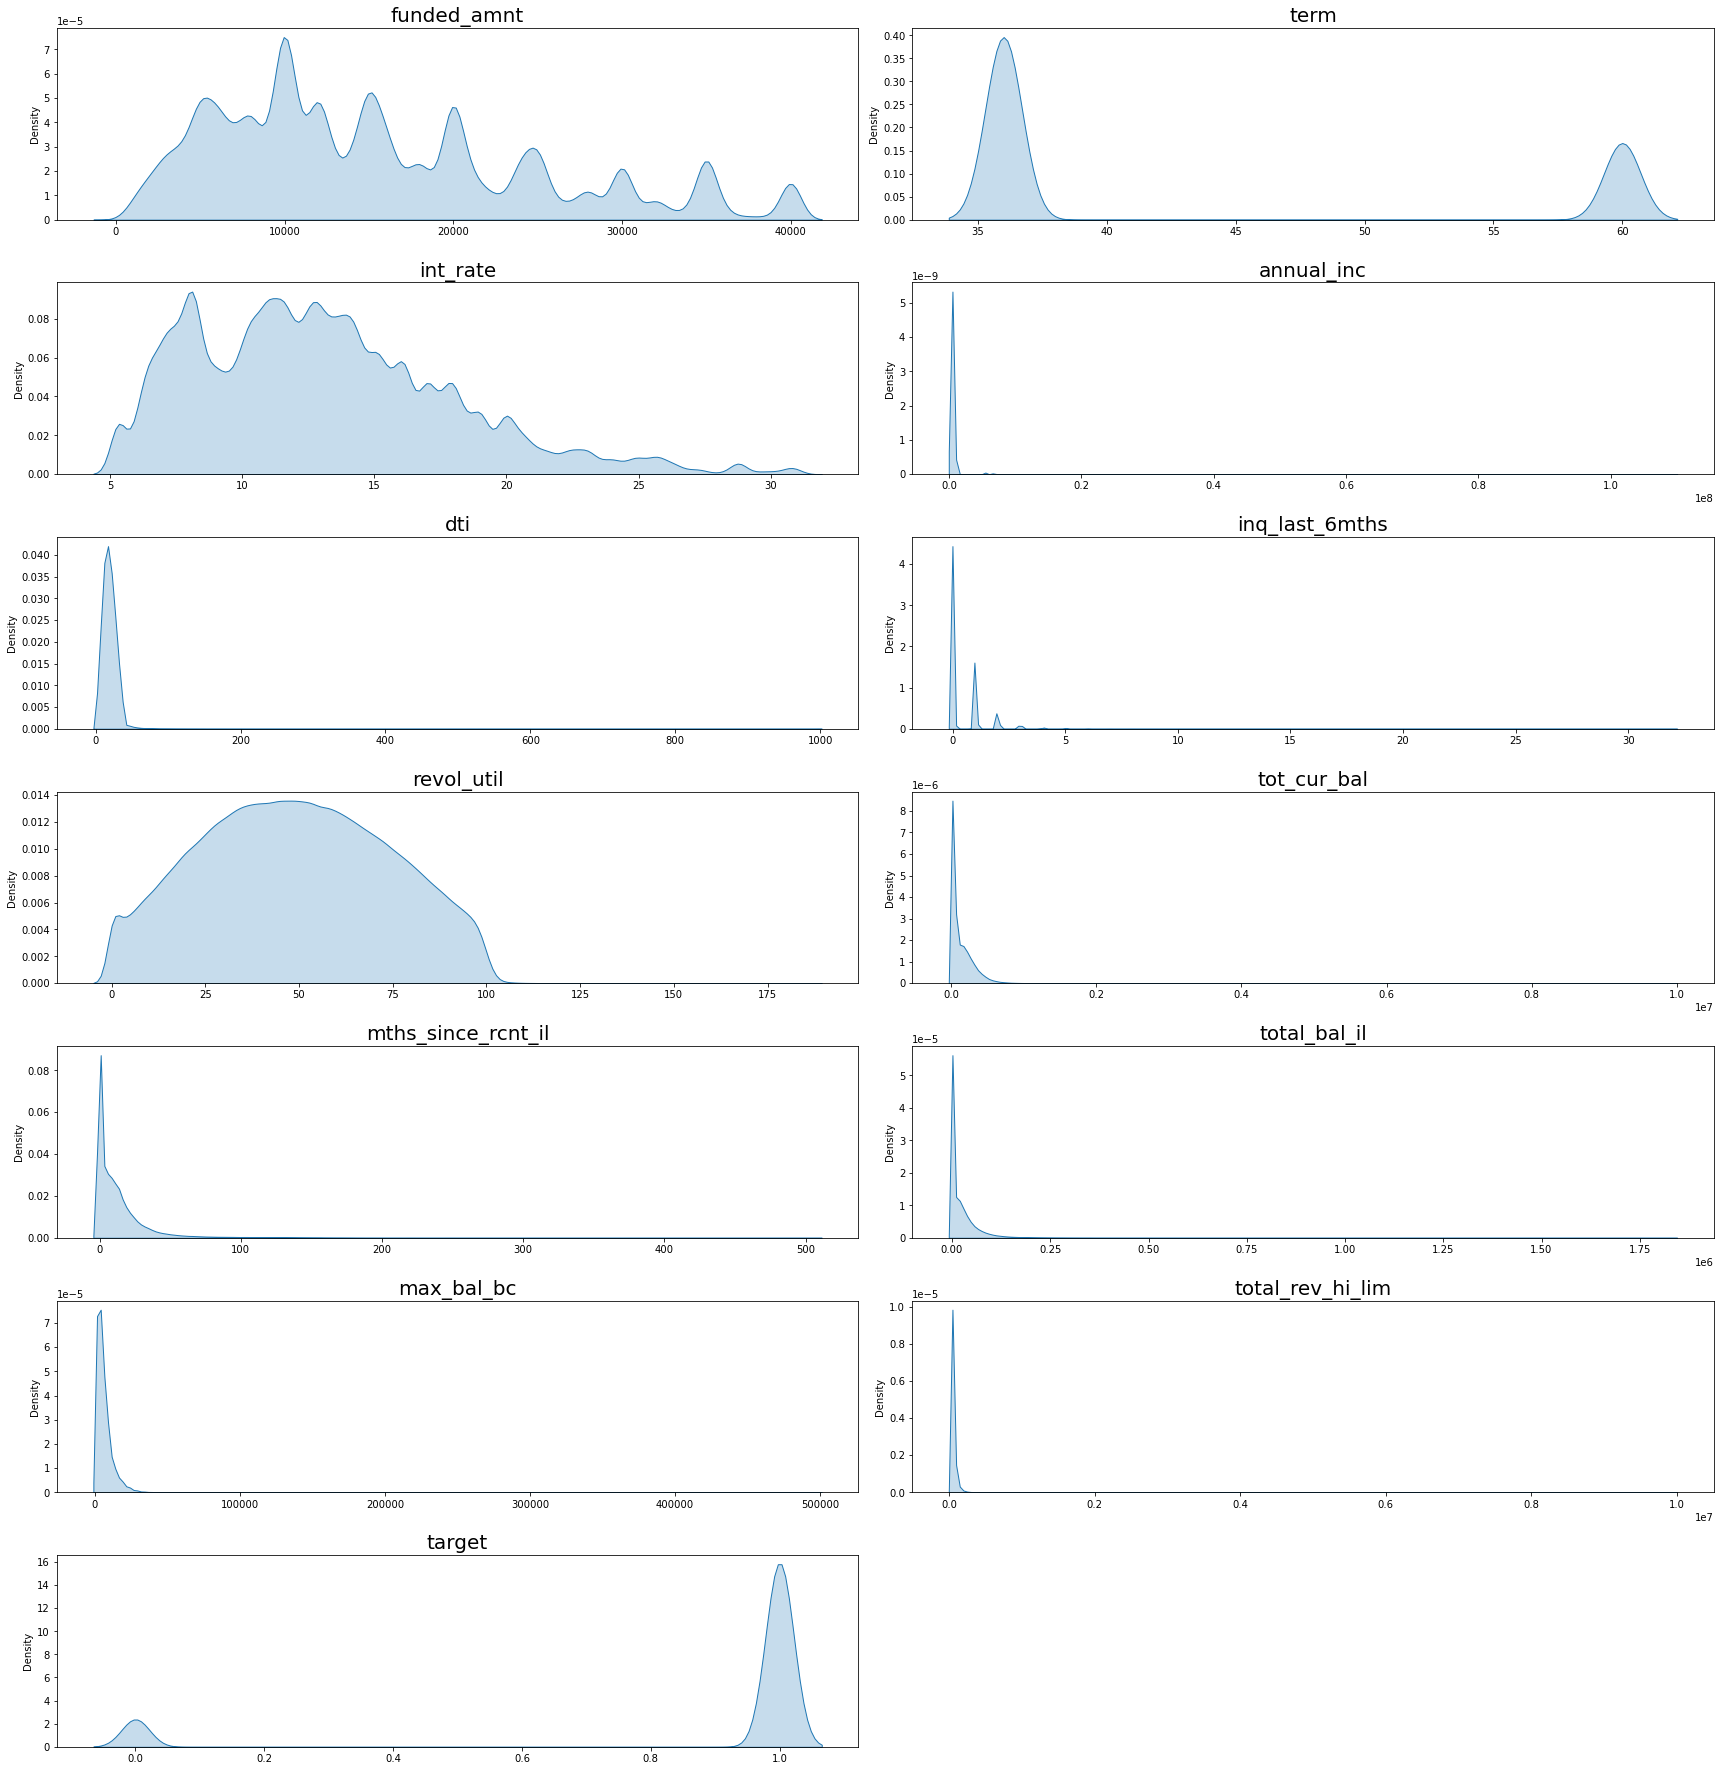

In [12]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.kdeplot(x = dados_WoE_VI[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

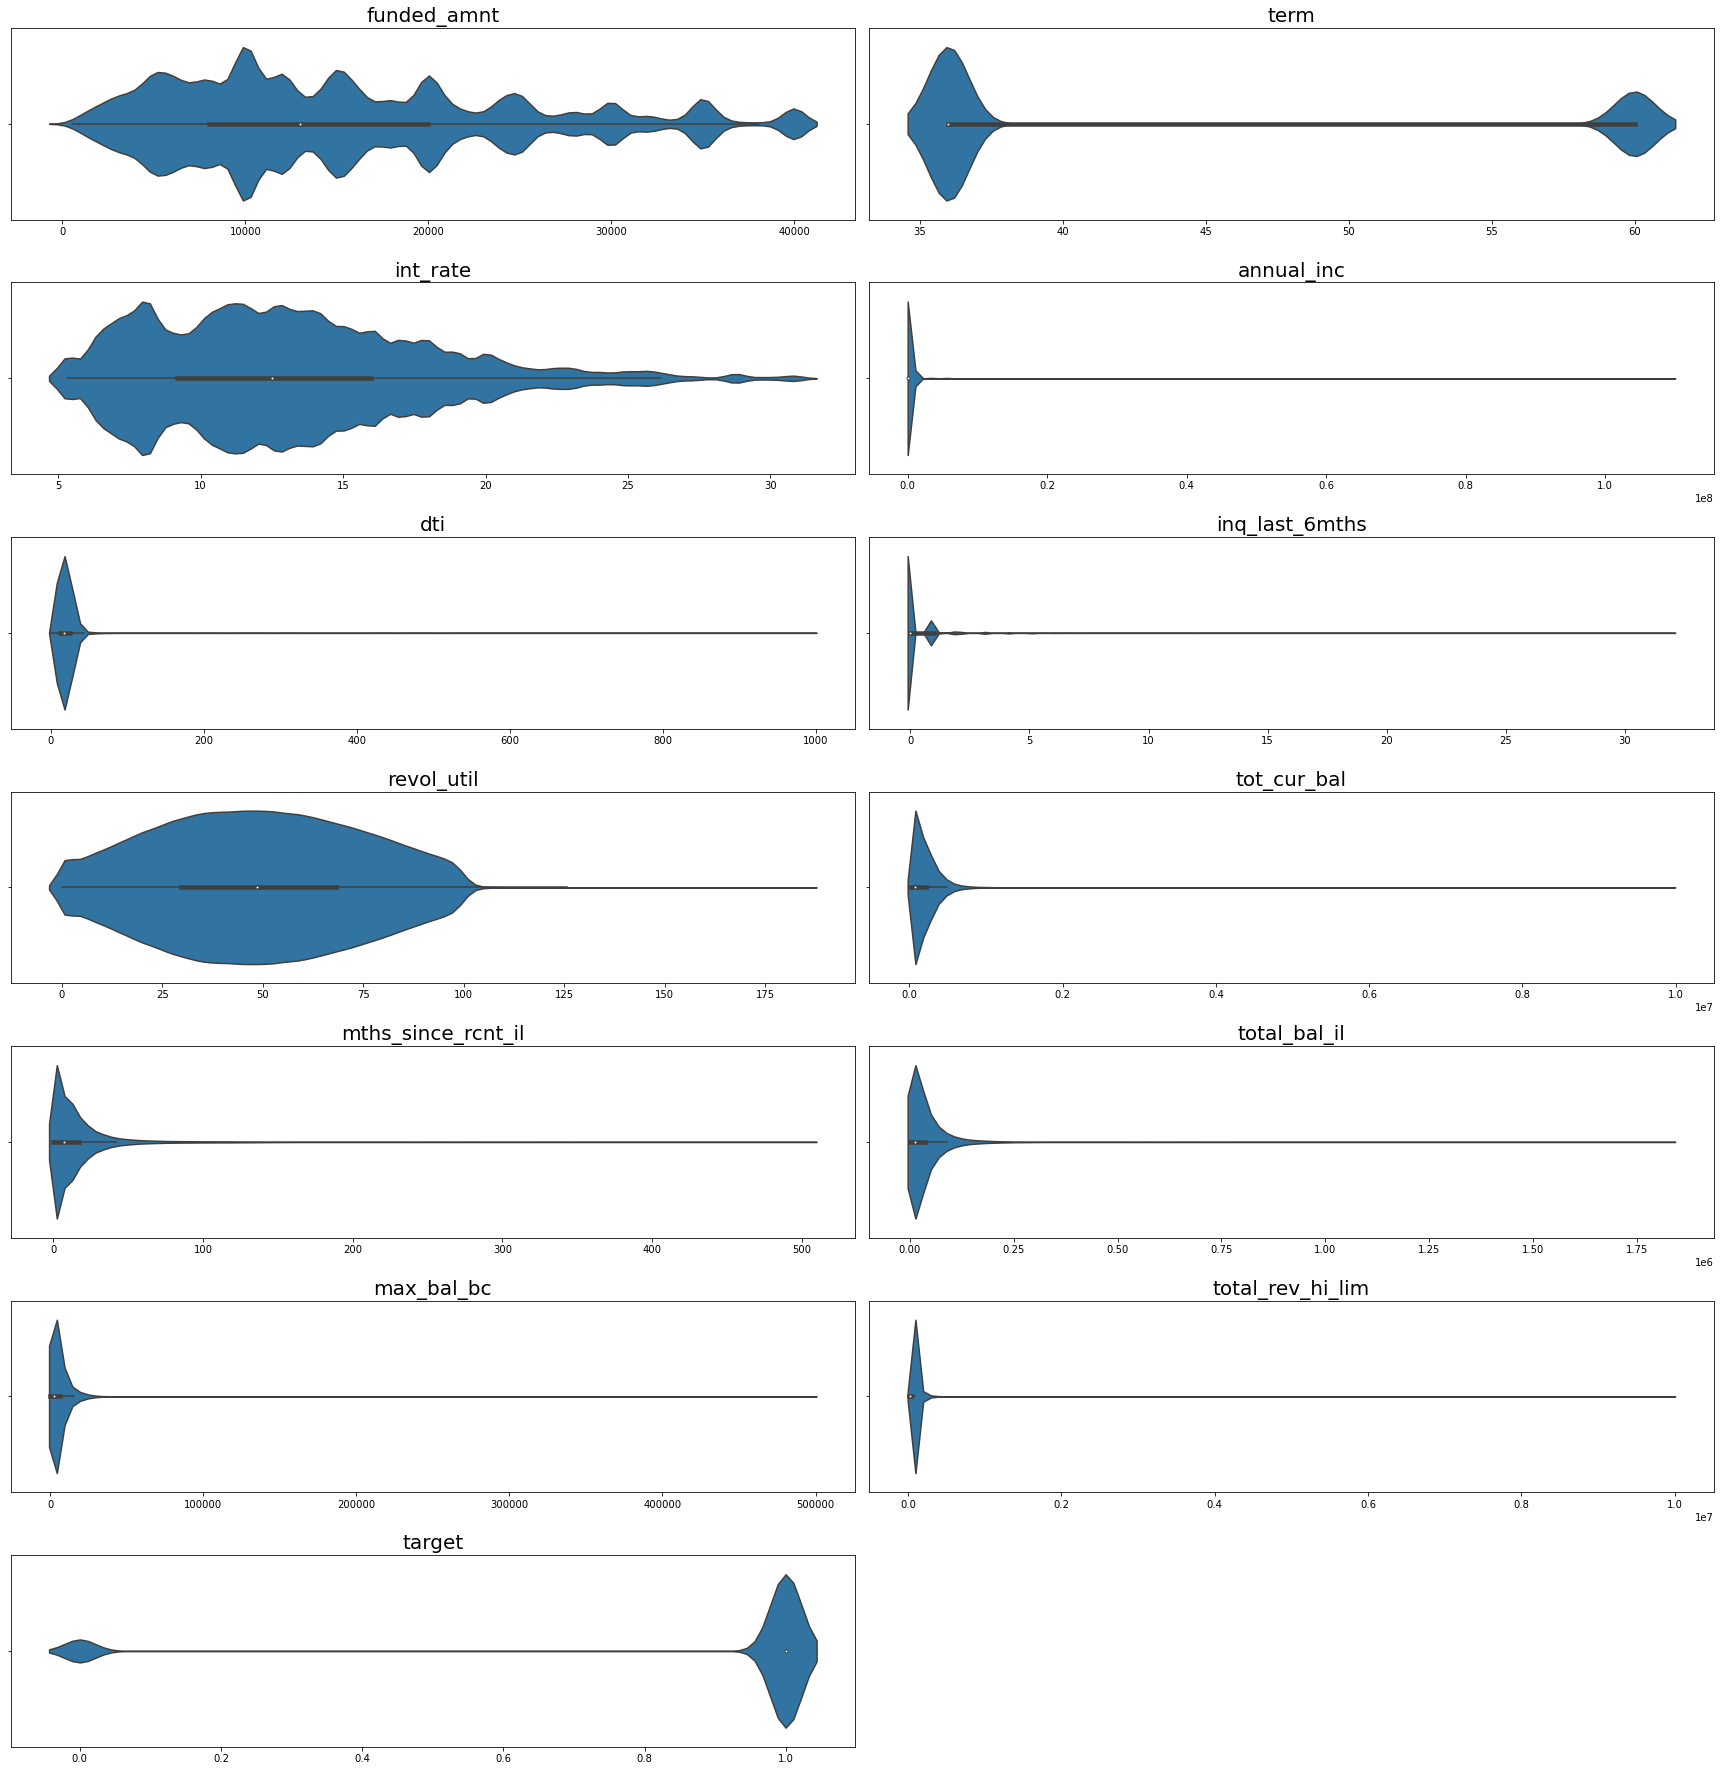

In [13]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.violinplot(x = dados_WoE_VI[var_num[i]], shade = True)
    plt.title(var_num[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### Avaliando a distribuição das variáveis categóricas

- A maioria dos empréstimo são para consolidação de débitos, ou cartão de crédito;
- A maioria das pessoas vivem em casa hipotecadas ou de aluguel;
- A maioria dos empréstimos são da categoria B ou C;

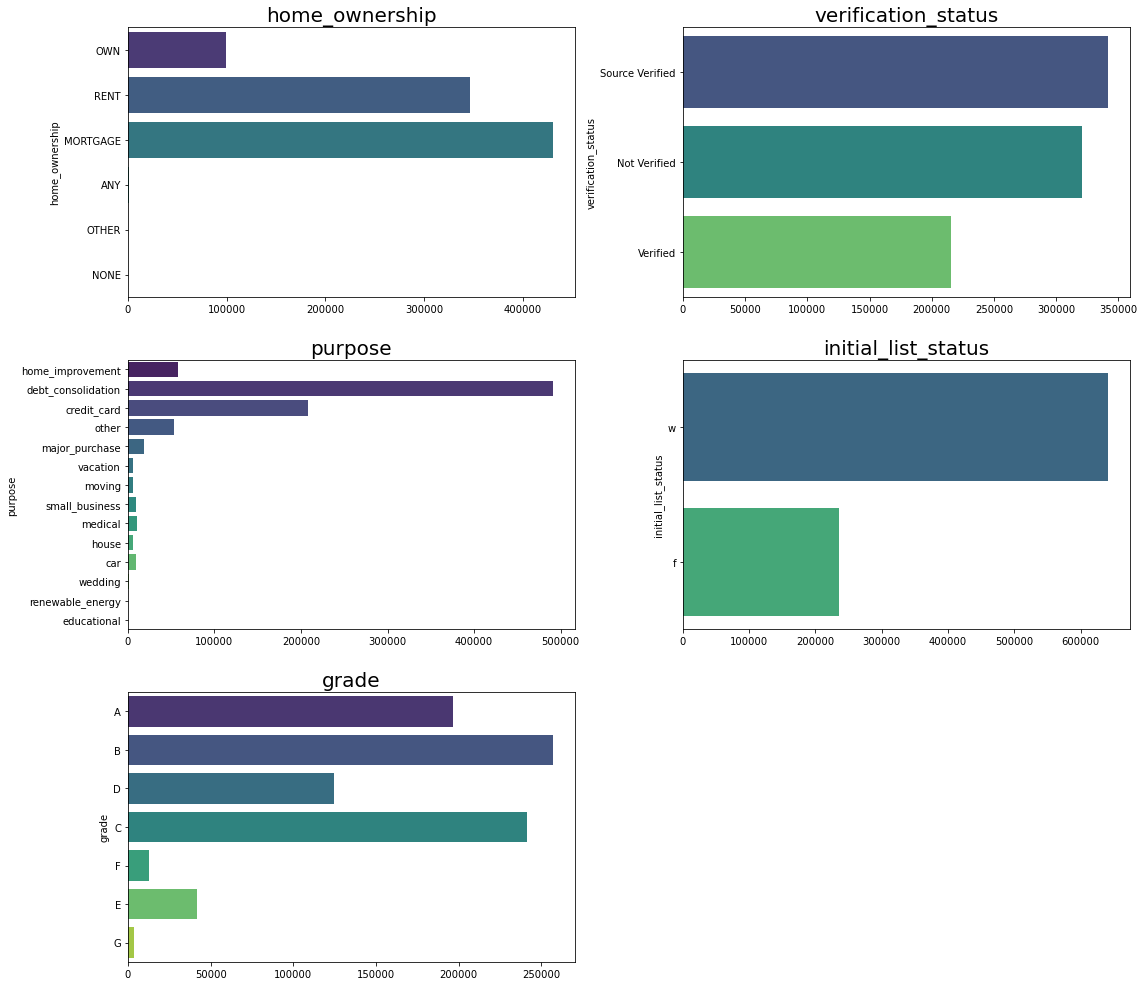

In [14]:
plt.figure(figsize=(16, 14))

for i in range(0, len(var_cat)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y = dados_WoE_VI[var_cat[i]], palette = 'viridis')
    plt.title(var_cat[i], fontsize = 20)
    plt.xlabel(' ')
    plt.tight_layout()

### Análise bivariada

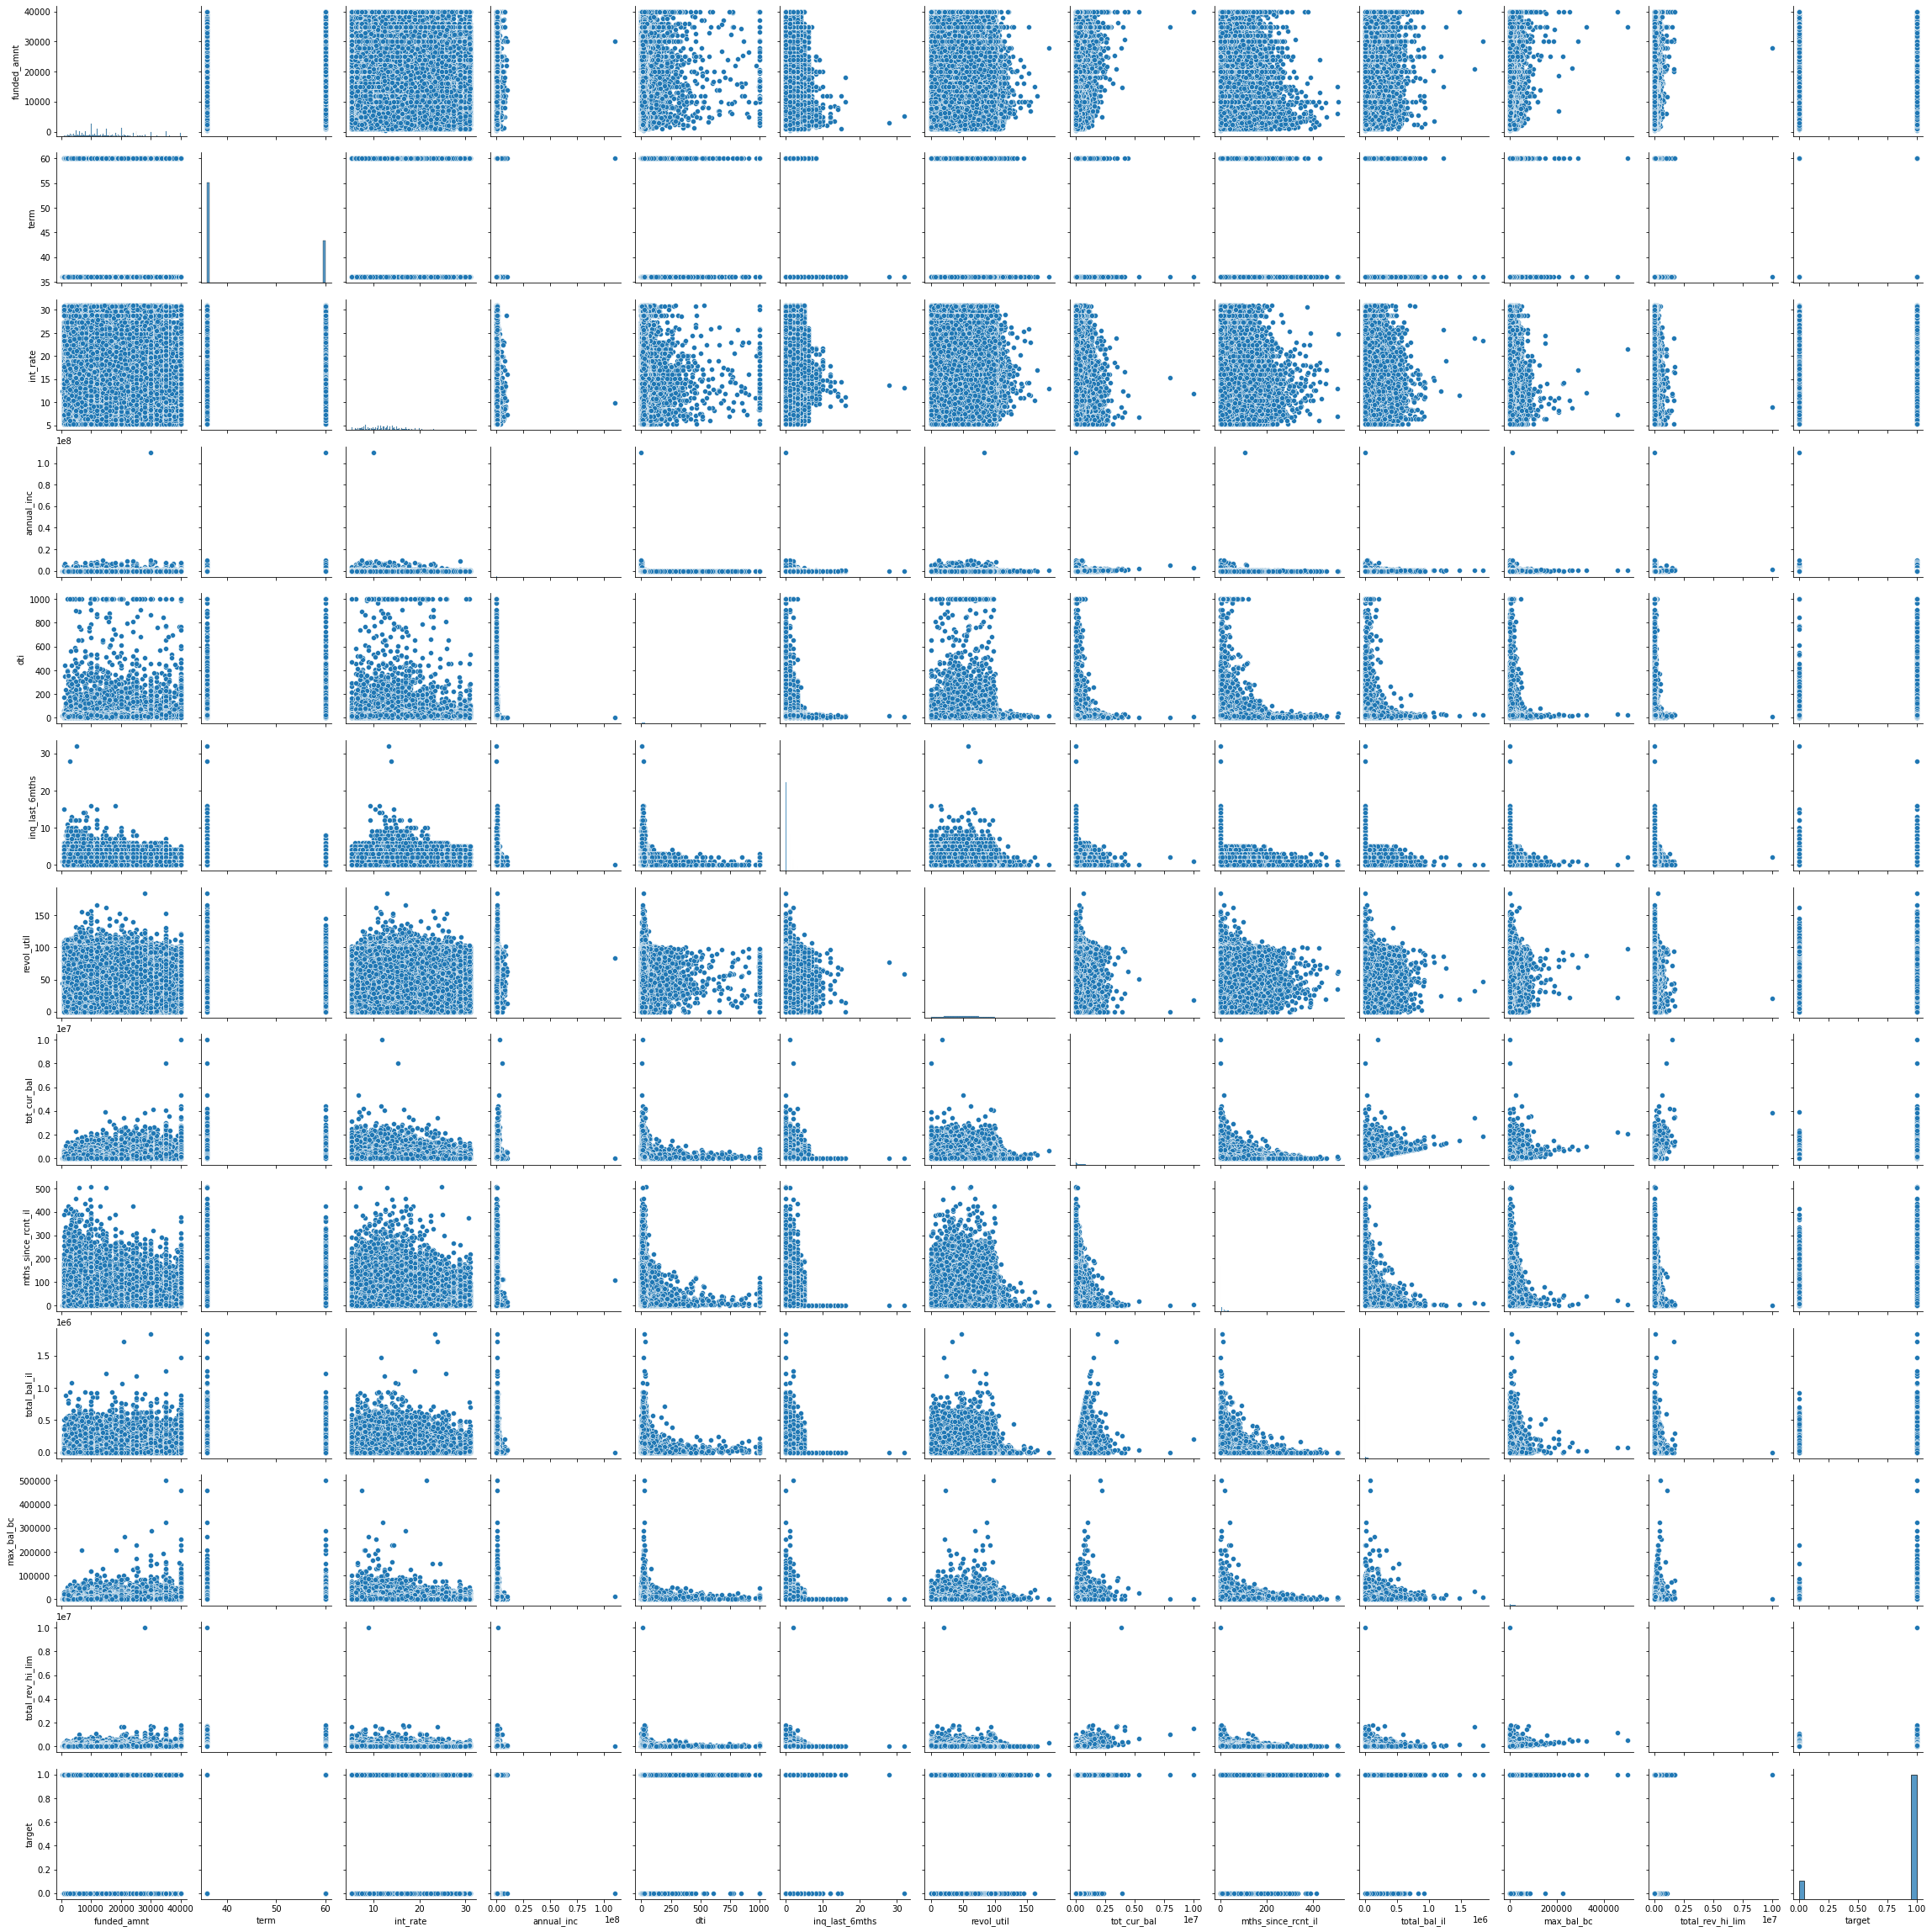

In [15]:
# pairplot das variáveis

sns.pairplot(dados_WoE_VI);

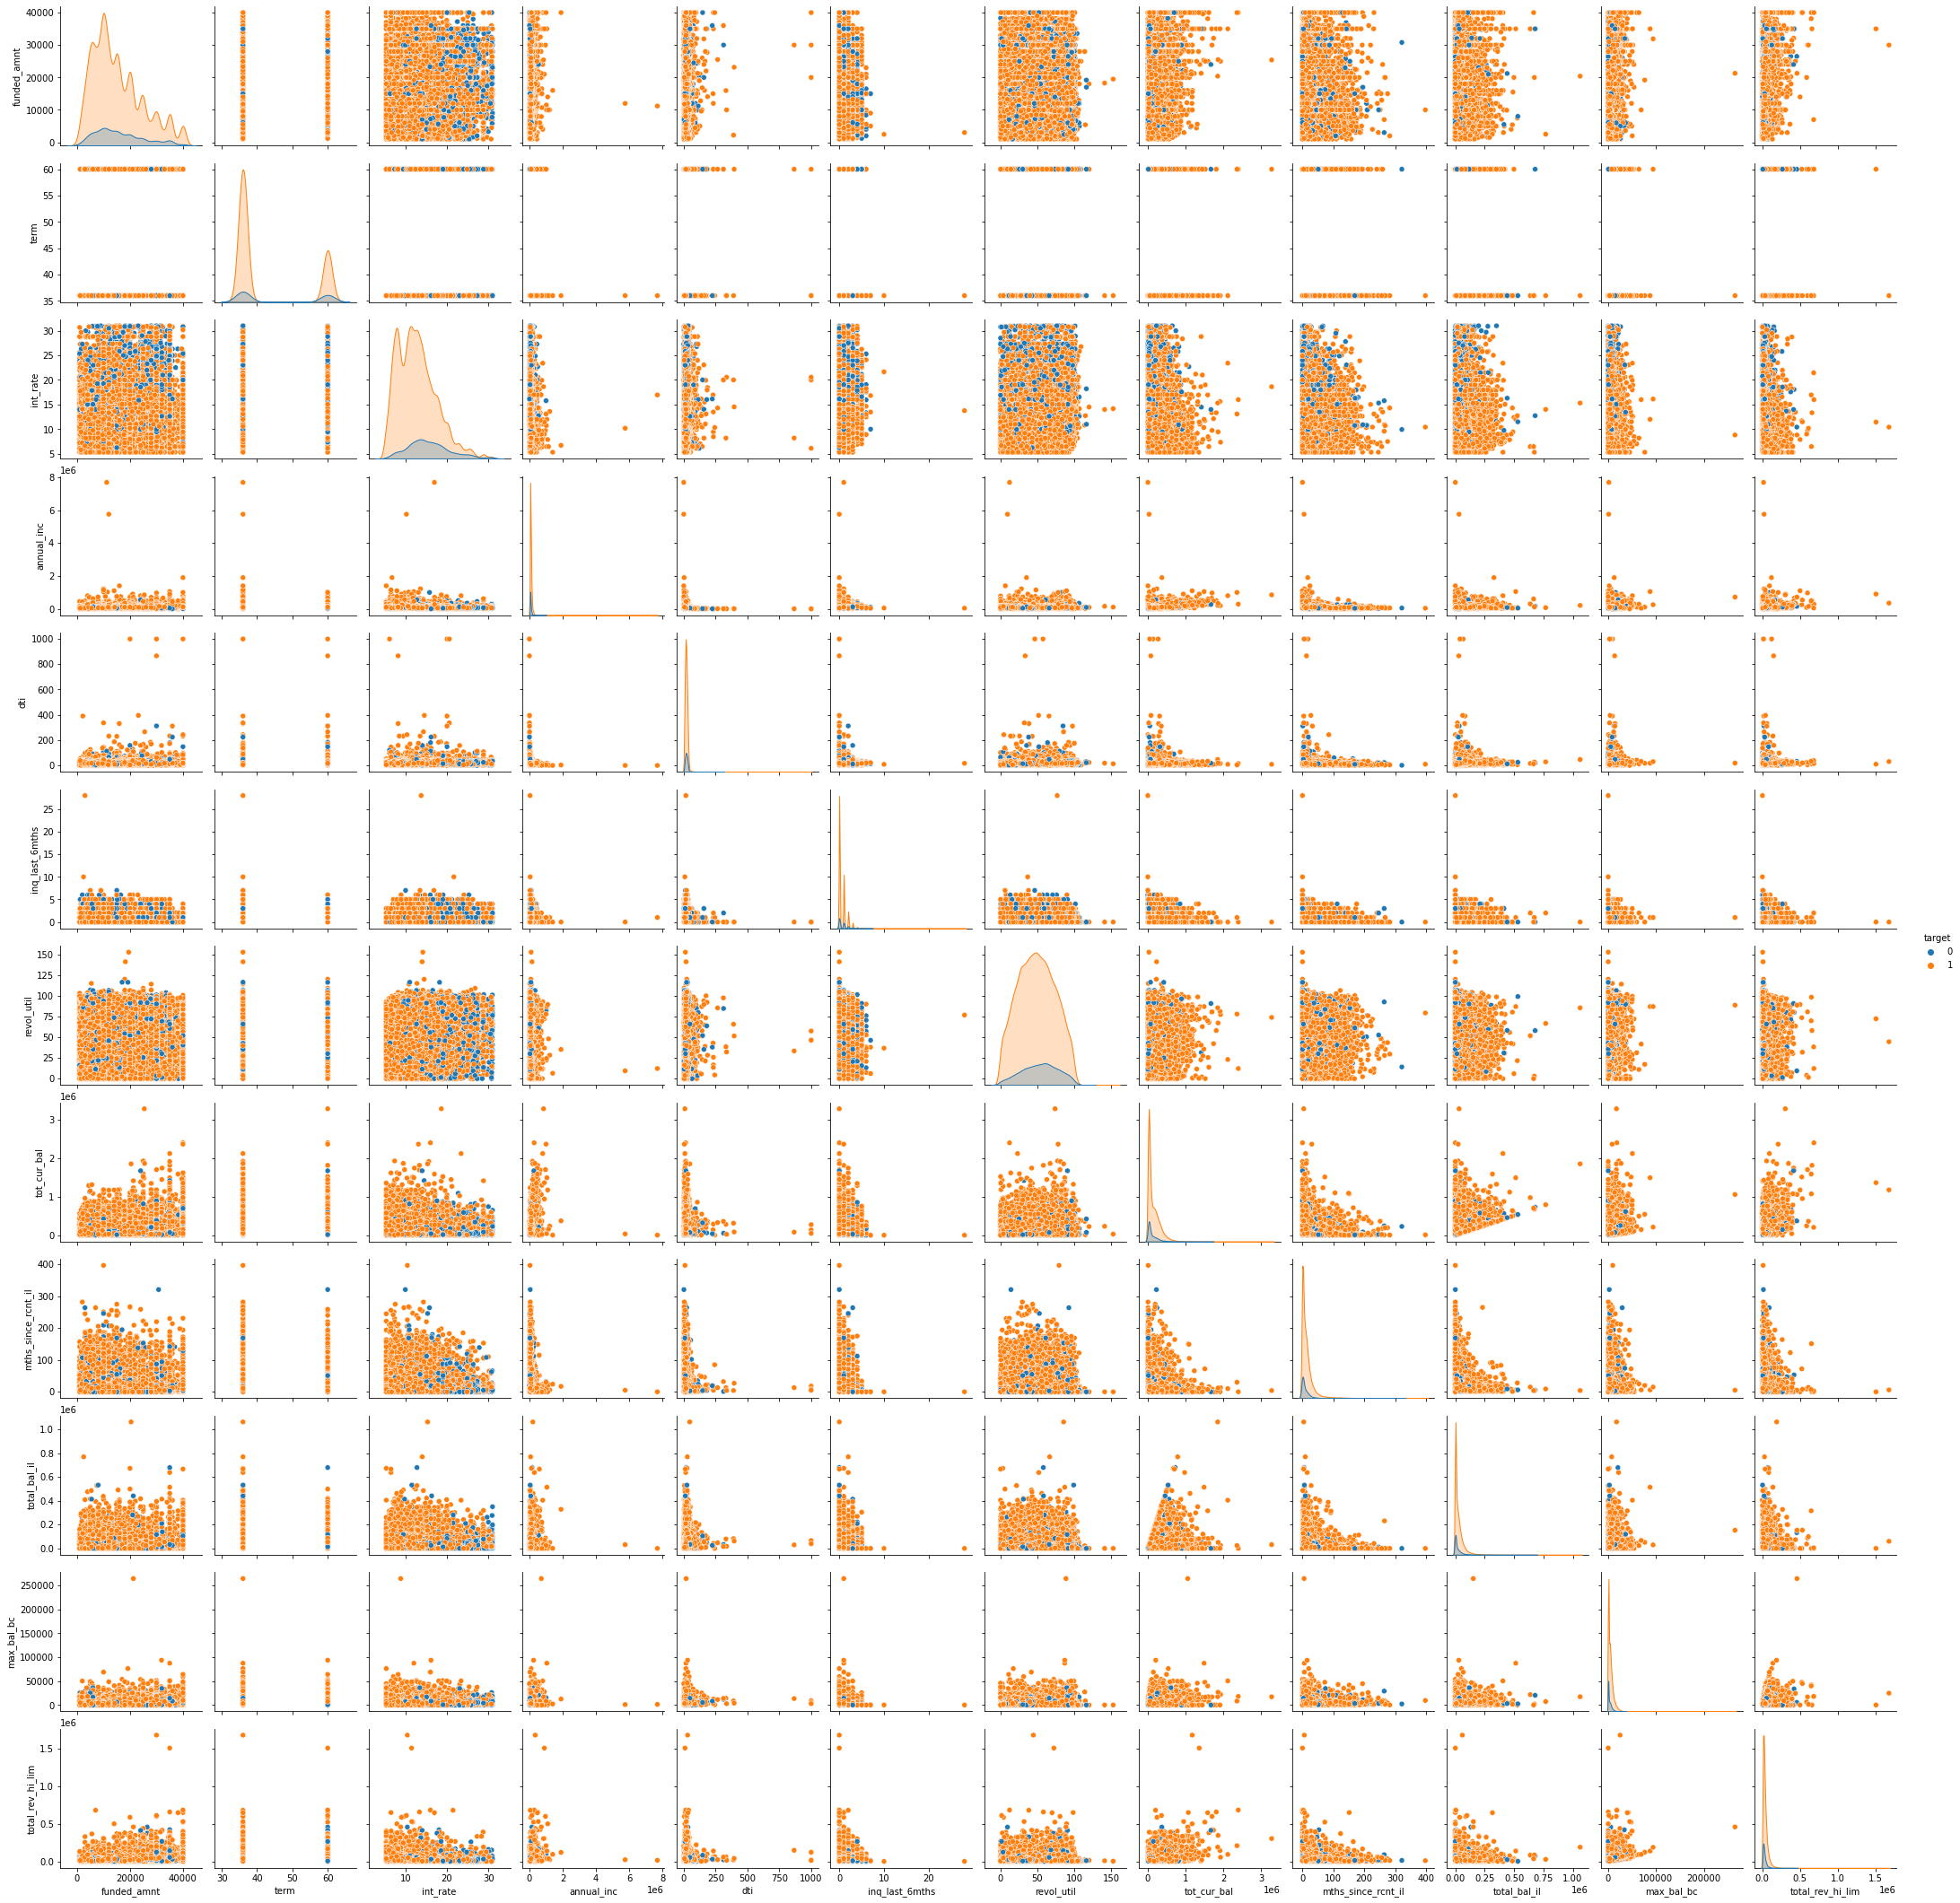

In [17]:
# pairplot usando target como hue

sns.pairplot(dados_WoE_VI, hue = 'target');

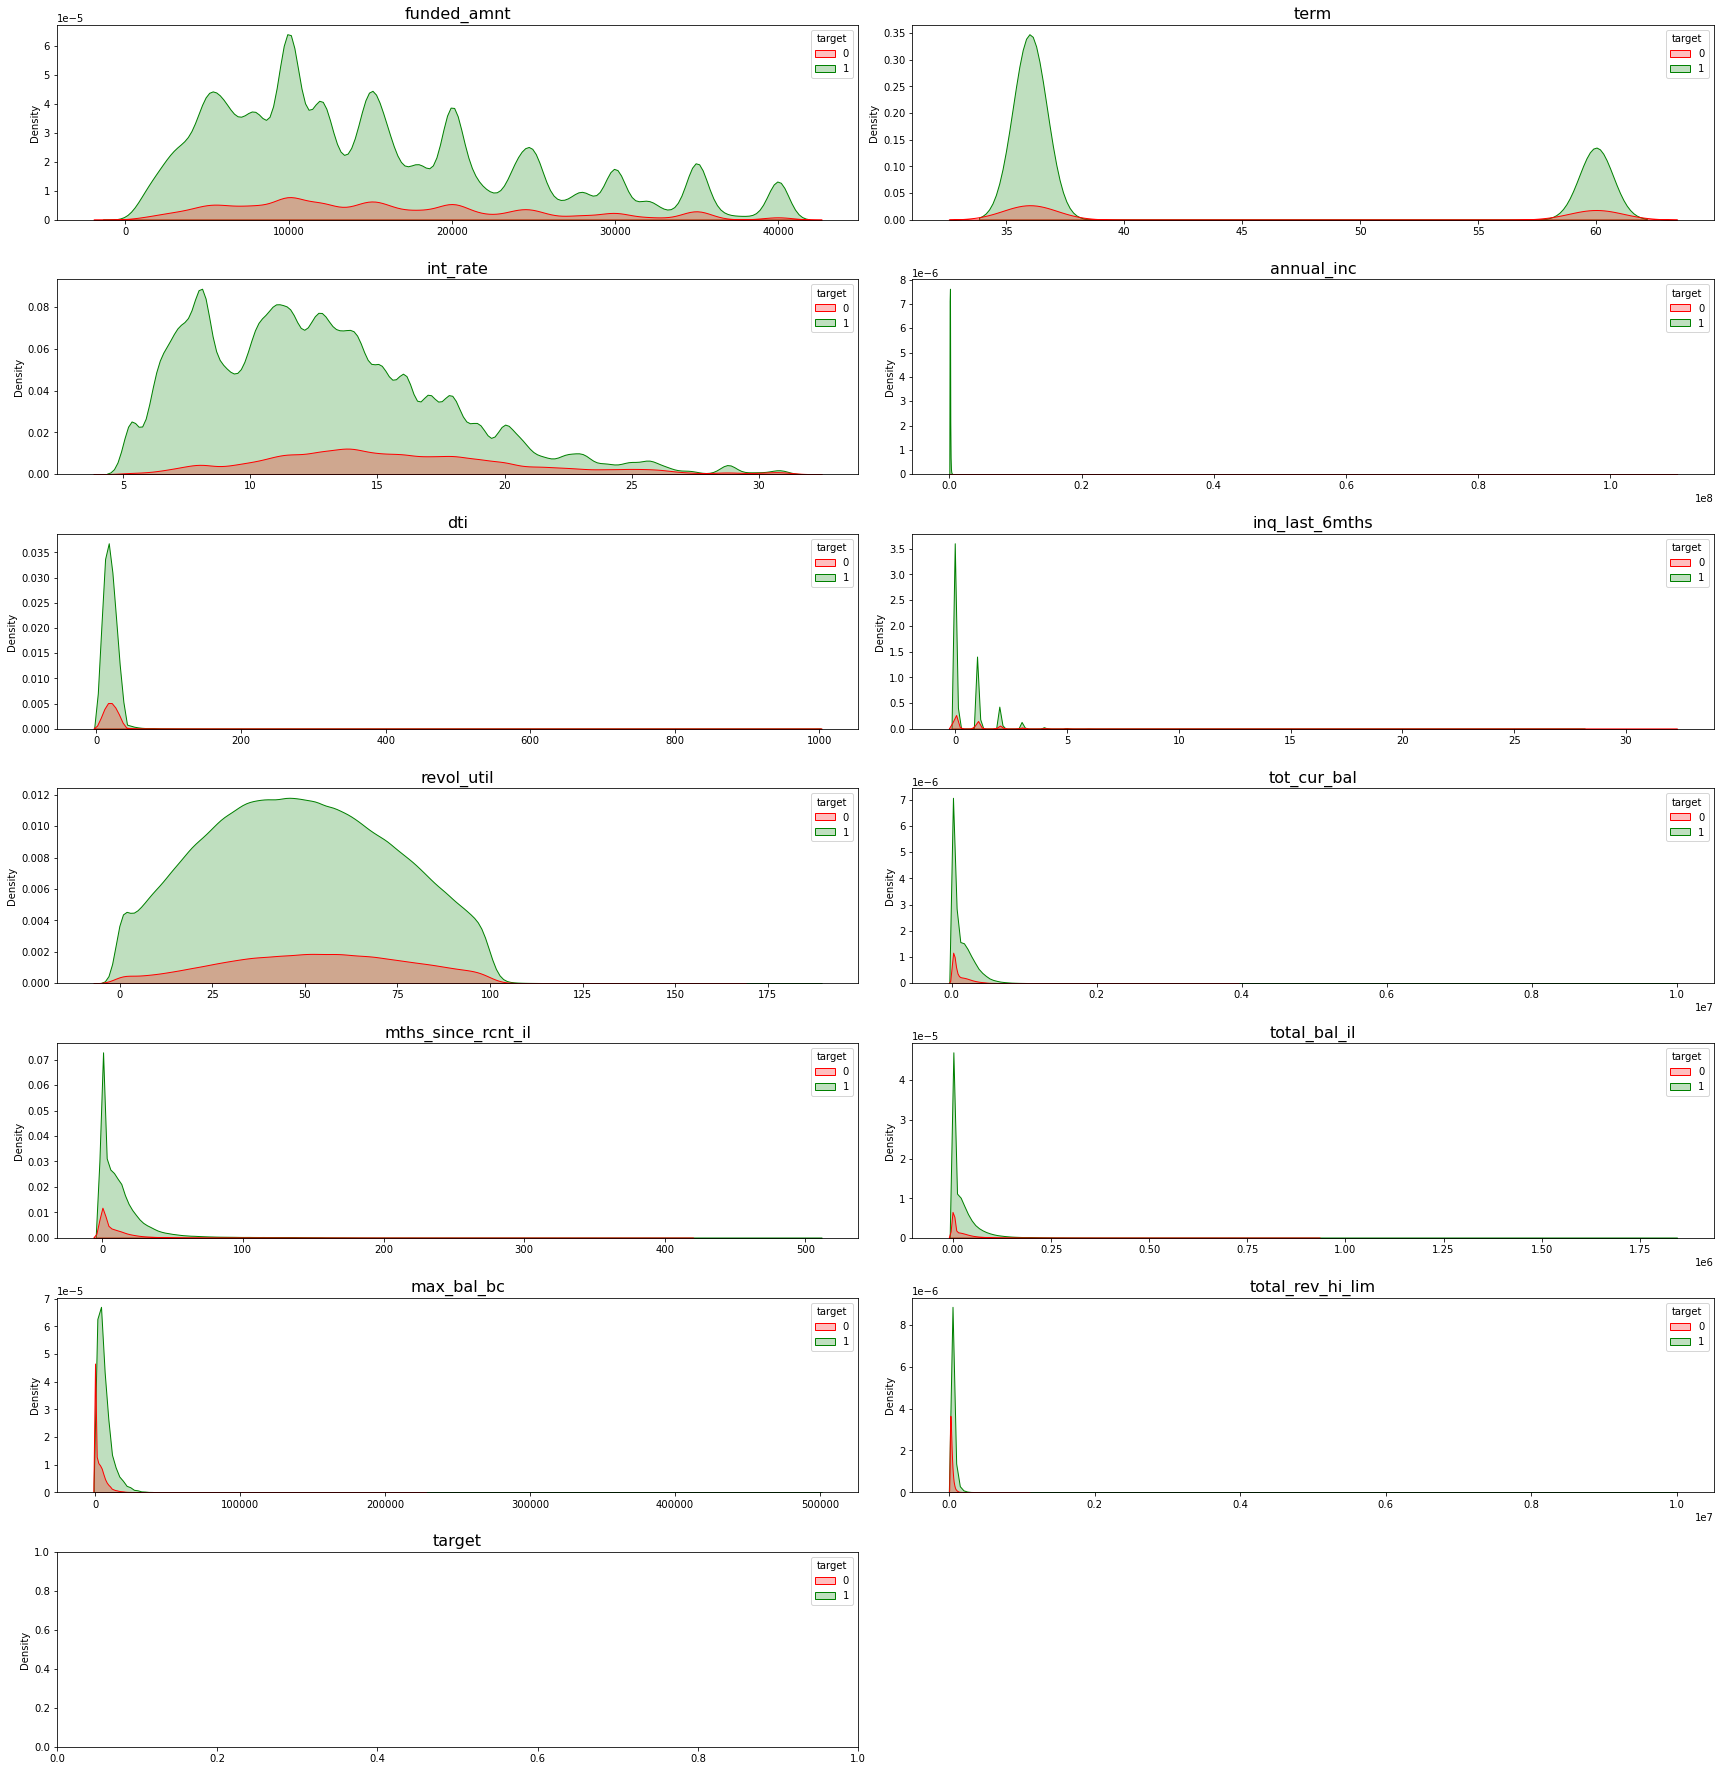

In [18]:
plt.figure(figsize=(24, 28))

for i in range(0,len(var_num)):
    plt.subplot(8, 2, i + 1)
    sns.kdeplot(x = dados_WoE_VI[var_num[i]], 
                palette = ['red', 'green'], 
                shade = True, 
                hue = dados_WoE_VI['target'],
                warn_singular = False)
    
    plt.title(var_num[i], fontsize = 16)
    plt.xlabel(' ')
    plt.tight_layout()

- Empréstimos listados como W possuem uma maior taxa de adimplência;
- Empréstimos para consolidação de débitos possuem uma taxa de adimplência mais alta entre todas as outras categorias;

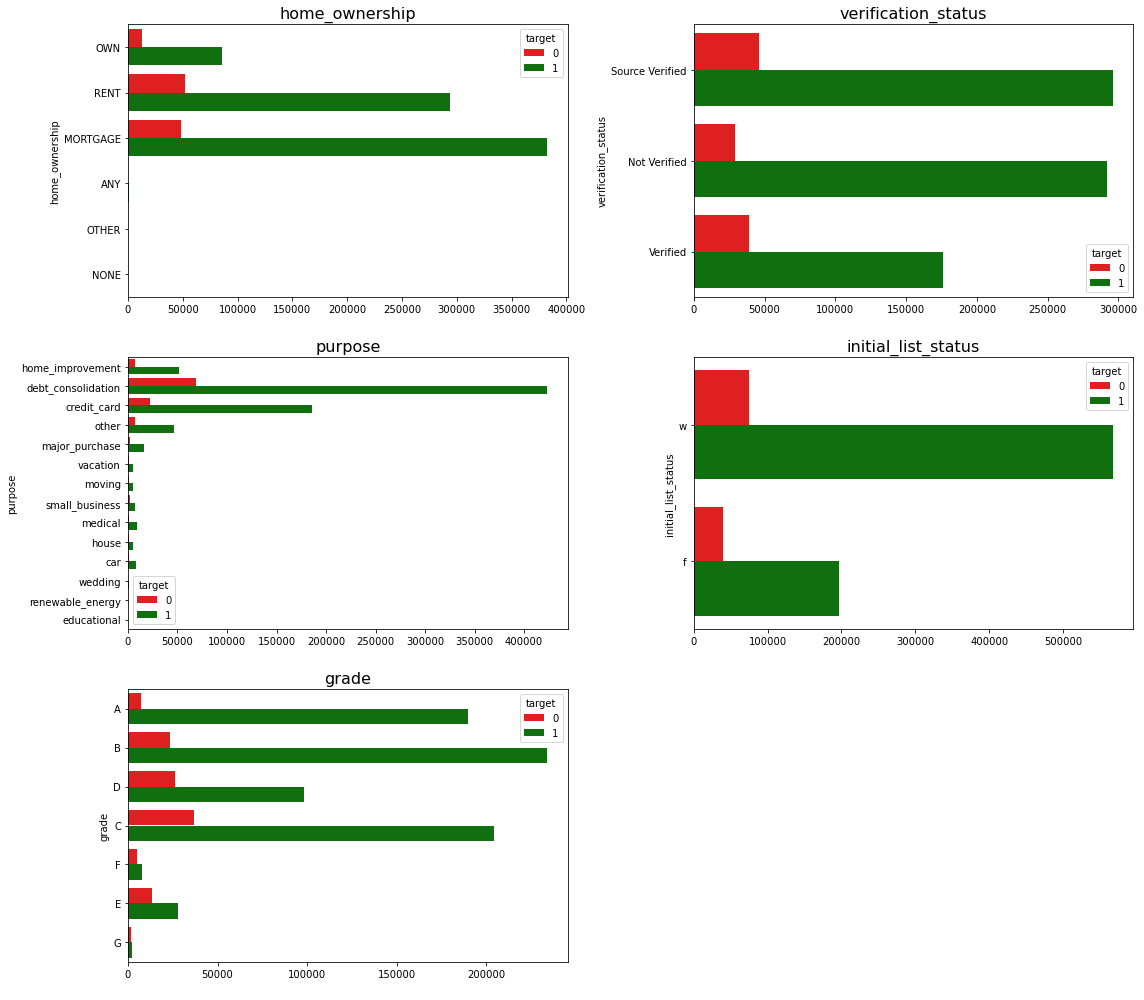

In [19]:
plt.figure(figsize=(16, 14))

for i in range(0, len(var_cat)):
    plt.subplot(3, 2, i + 1)
    sns.countplot(y = dados_WoE_VI[var_cat[i]], palette = ['red', 'green'], hue = dados_WoE_VI['target'])
    plt.title(var_cat[i], fontsize = 16)
    plt.xlabel(' ')
    plt.tight_layout()

Maior média, mediana e desvio padrão nas variáveis `annual_inc` e `tot_cur_bal` da variável target.

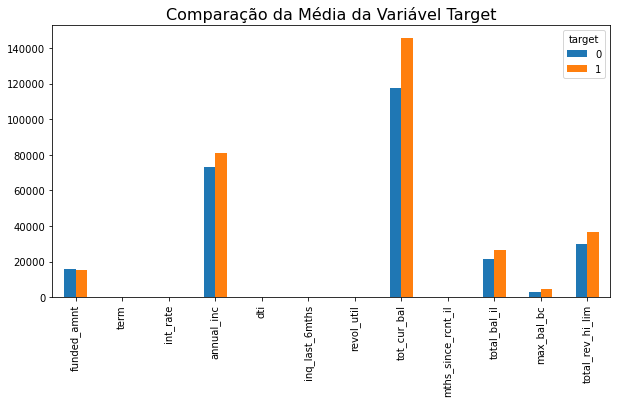

In [20]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_WoE_VI.groupby('target', as_index = True).mean().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação da Média da Variável Target', fontsize = 16);

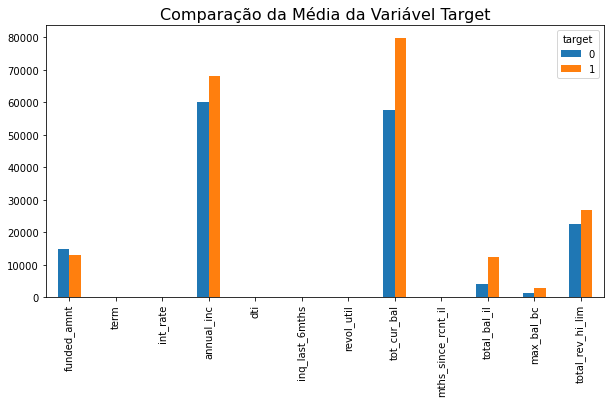

In [21]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_WoE_VI.groupby('target', as_index = True).median().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação da Média da Variável Target', fontsize = 16);

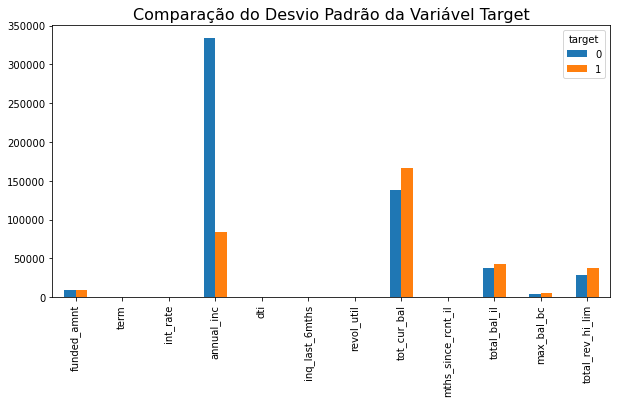

In [22]:
_, ax = plt.subplots(1, 1, figsize=(10, 5))
dados_WoE_VI.groupby('target', as_index = True).std().T.plot(kind = 'bar', ax = ax, rot = 90)
plt.title('Comparação do Desvio Padrão da Variável Target', fontsize = 16);

### Correlação

- Todas as variáveis apresentam uma correlação fraca com a variável target tanto positiva, quanto negativa.

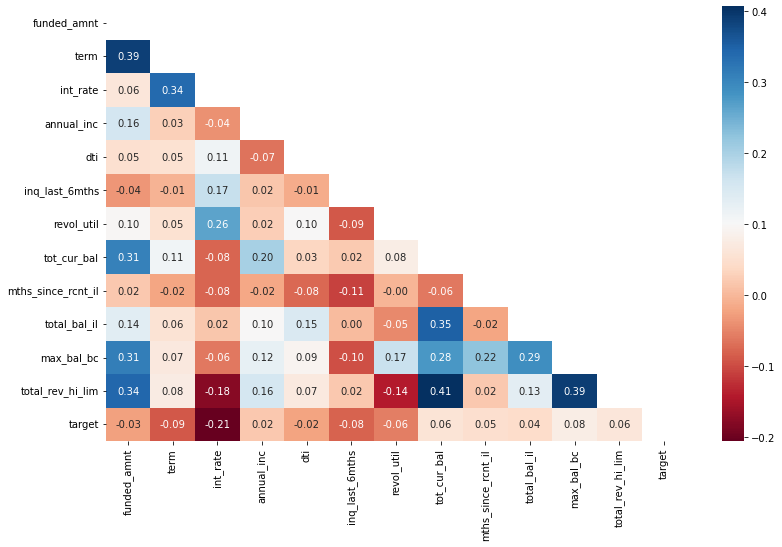

In [23]:
# matriz de correlação das variáveis 

sns.set_context(font_scale = 1.9)
plt.figure(figsize = (13, 8))
sns.heatmap(
    dados_WoE_VI.corr(), 
    annot = True, 
    fmt = '.2f', 
    cmap = 'RdBu',
    mask = np.triu(
        np.ones_like(dados_WoE_VI.corr()) 
    ) 
);

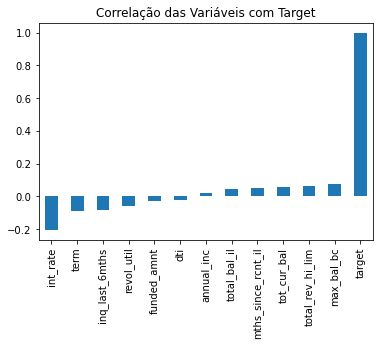

In [24]:
dados_WoE_VI.corr()['target'].sort_values().plot(kind = 'bar')
plt.title('Correlação das Variáveis com Target');

---